In [28]:
#importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [29]:
#reading the dataset
df=pd.read_csv('Carbon Emission.csv')
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [30]:
#seeing dataframe features to proceed further
print(df.shape)
print(df.columns.tolist())
df.info()

(10000, 20)
['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source', 'Transport', 'Vehicle Type', 'Social Activity', 'Monthly Grocery Bill', 'Frequency of Traveling by Air', 'Vehicle Monthly Distance Km', 'Waste Bag Size', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour', 'How Many New Clothes Monthly', 'How Long Internet Daily Hour', 'Energy efficiency', 'Recycling', 'Cooking_With', 'CarbonEmission']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  

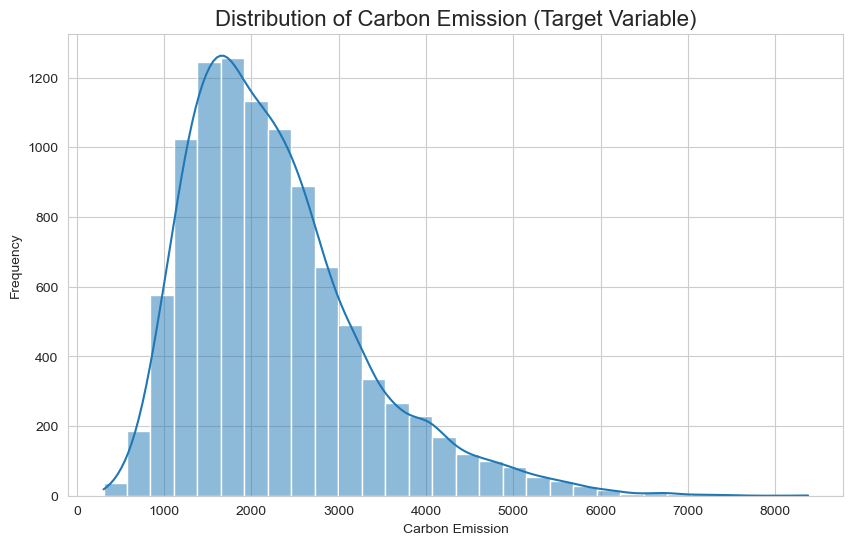

Visualizing relationships between numerical features and Carbon Emission...


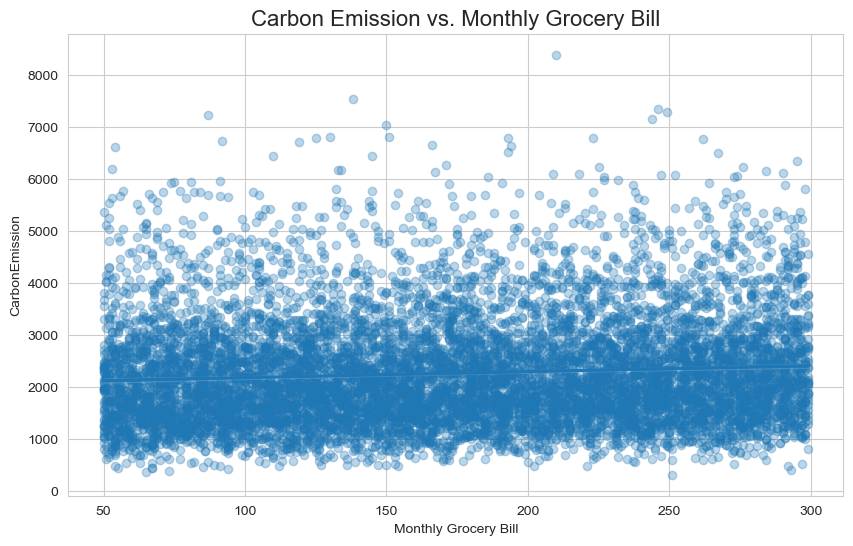

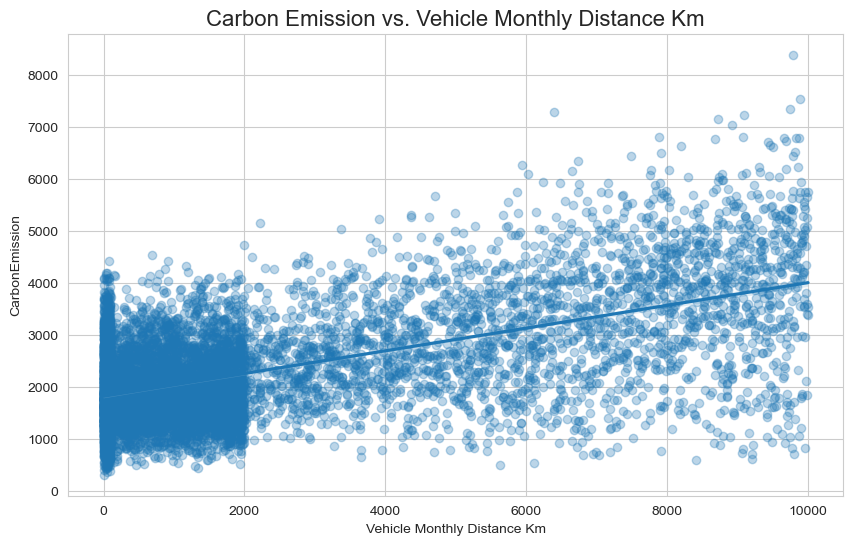

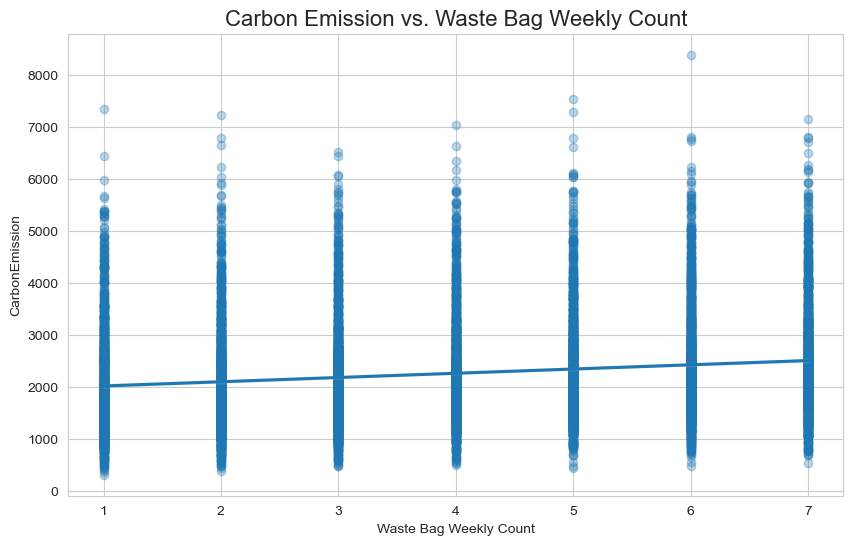

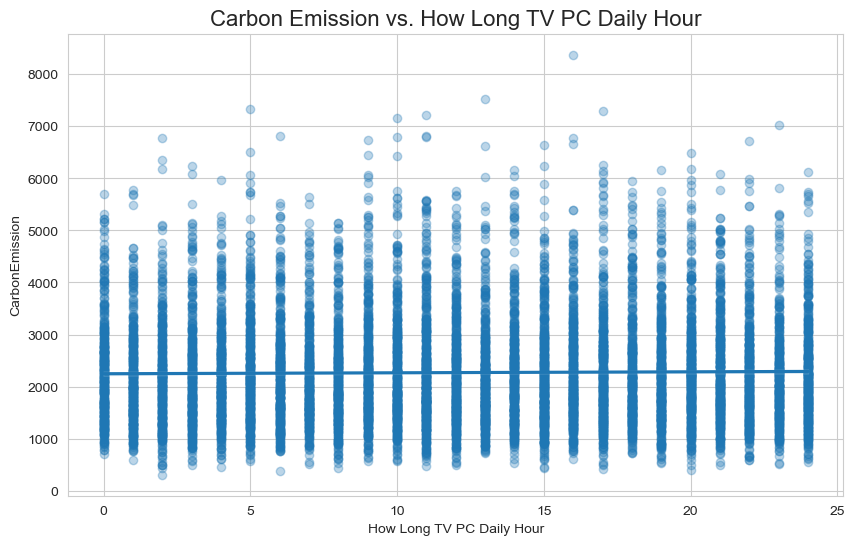

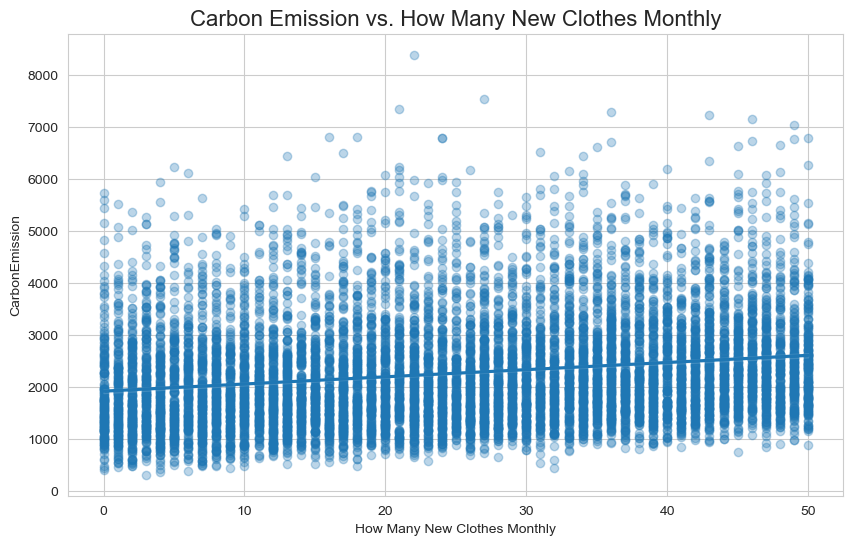

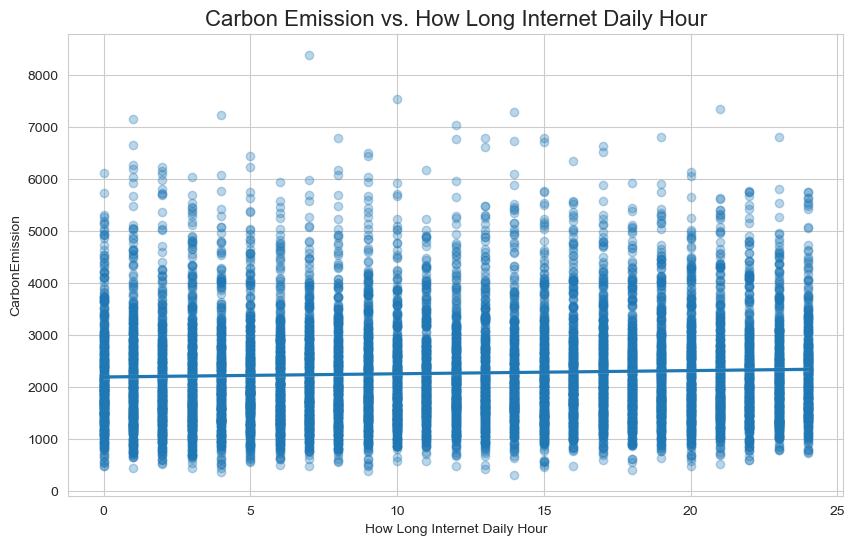


Visualizing relationships between categorical features and Carbon Emission...


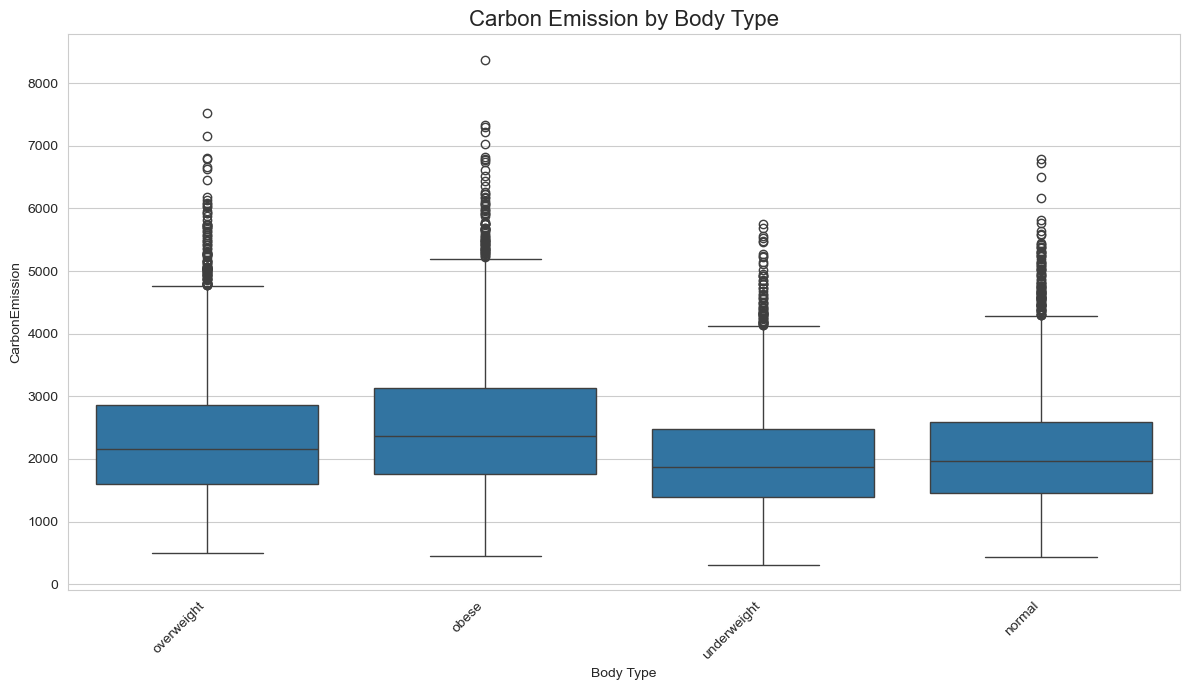

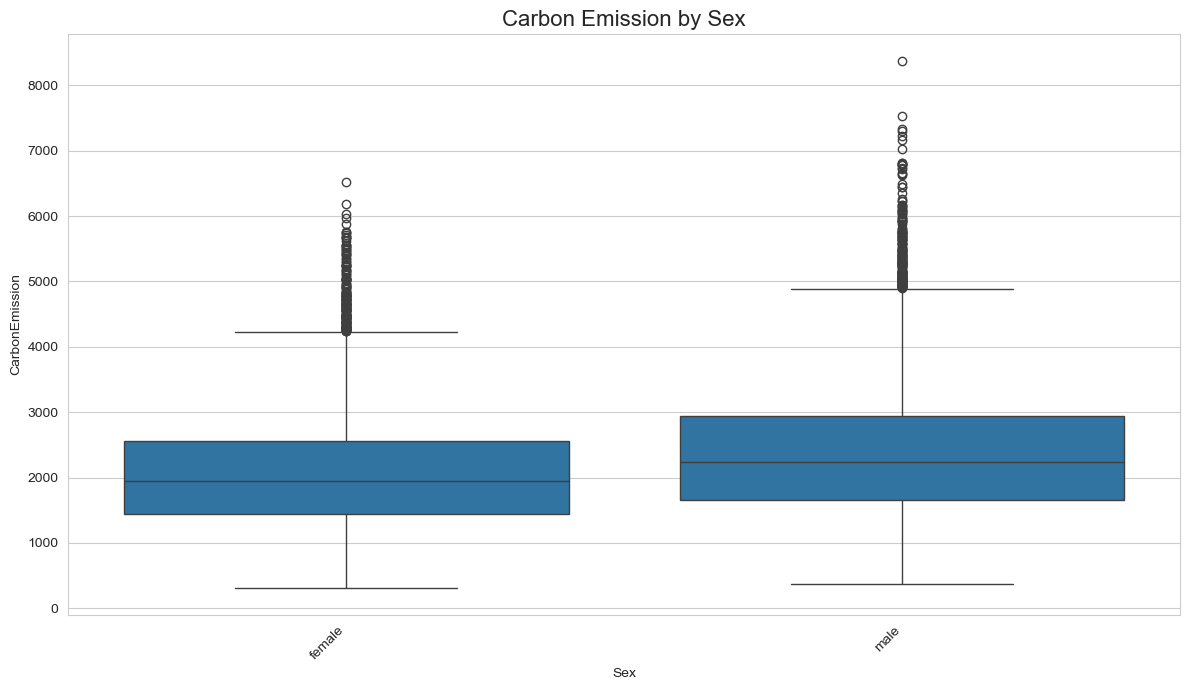

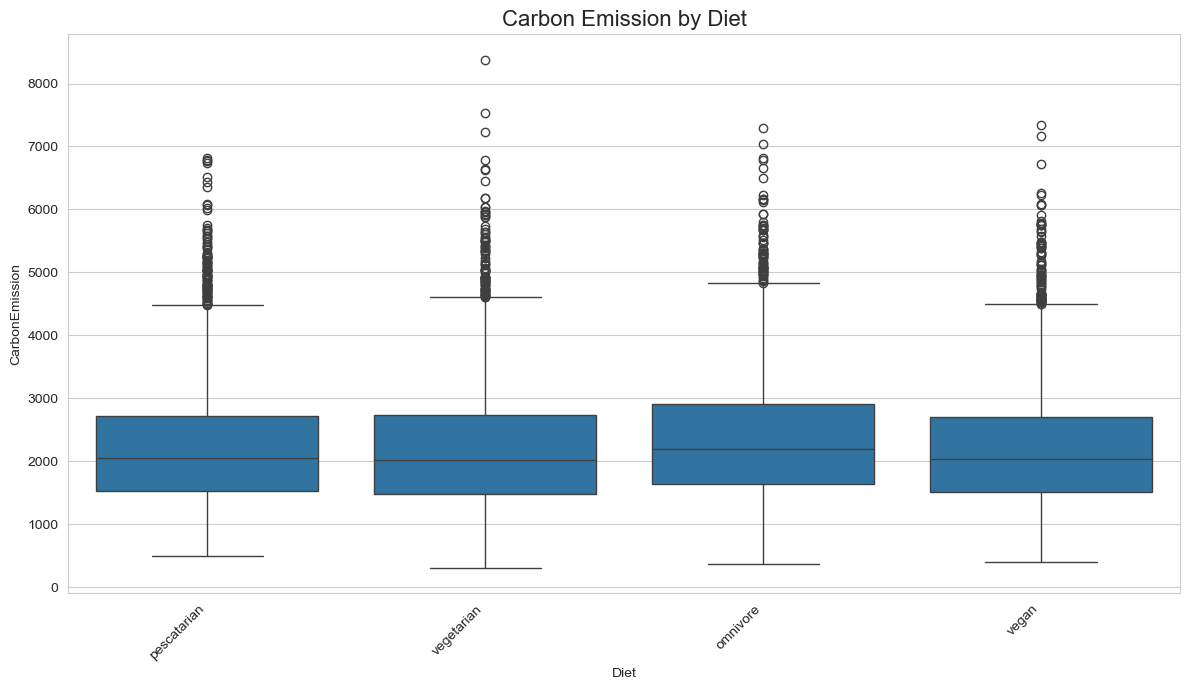

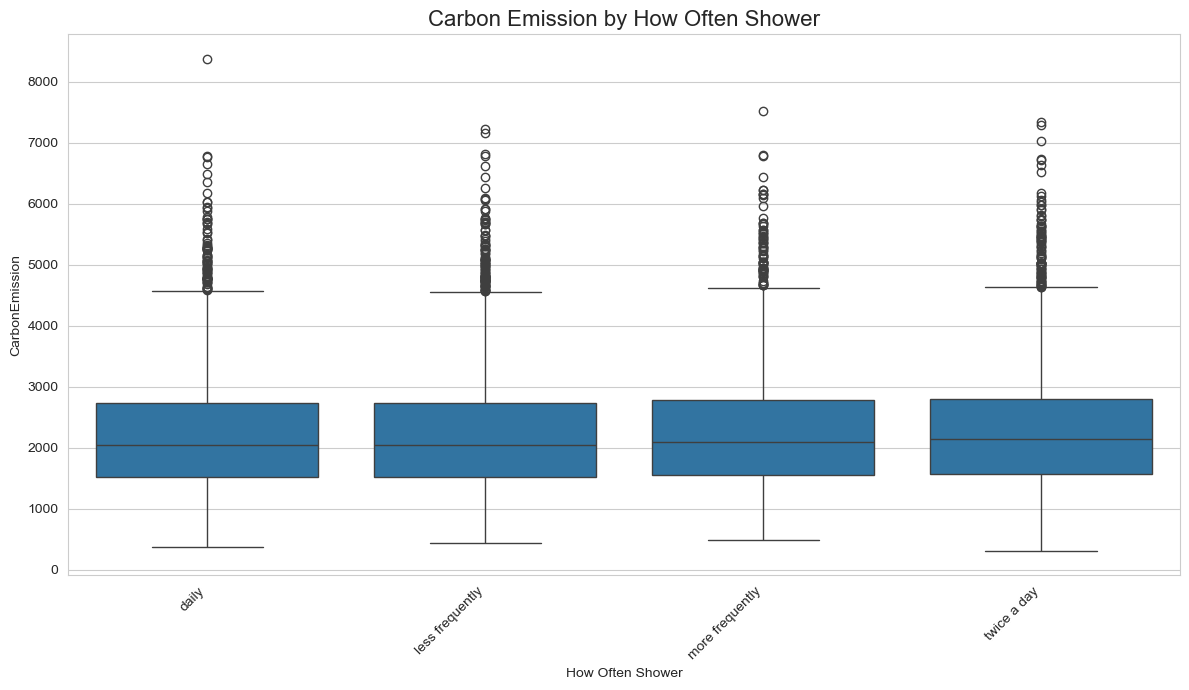

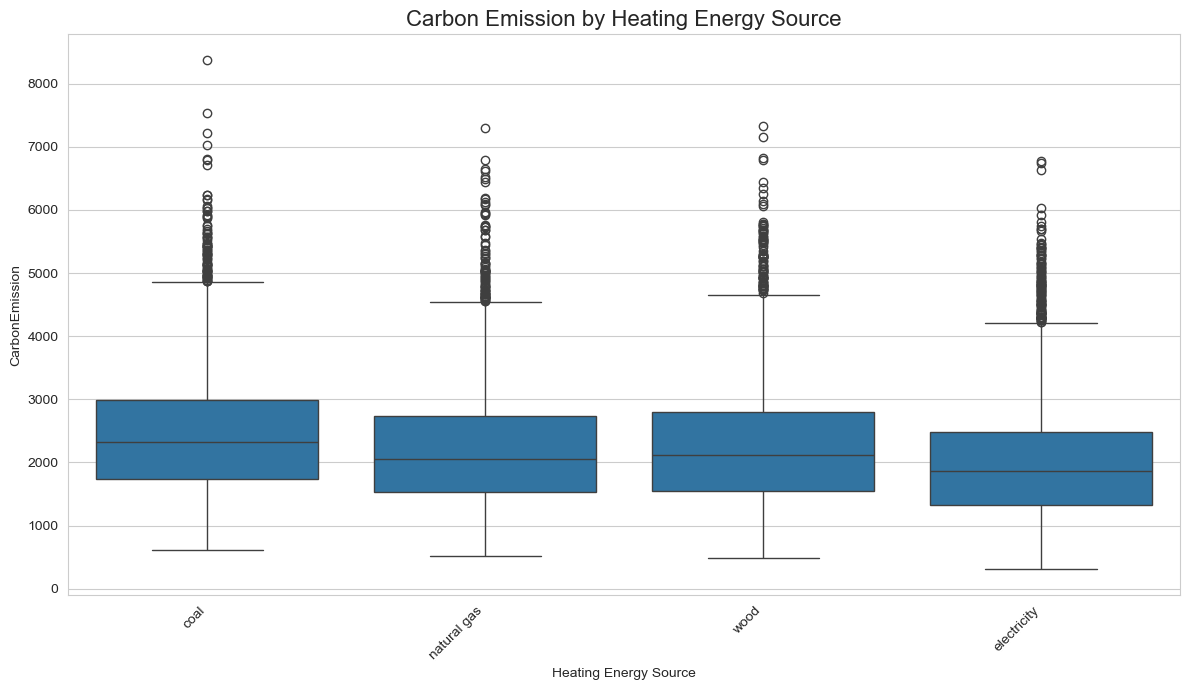

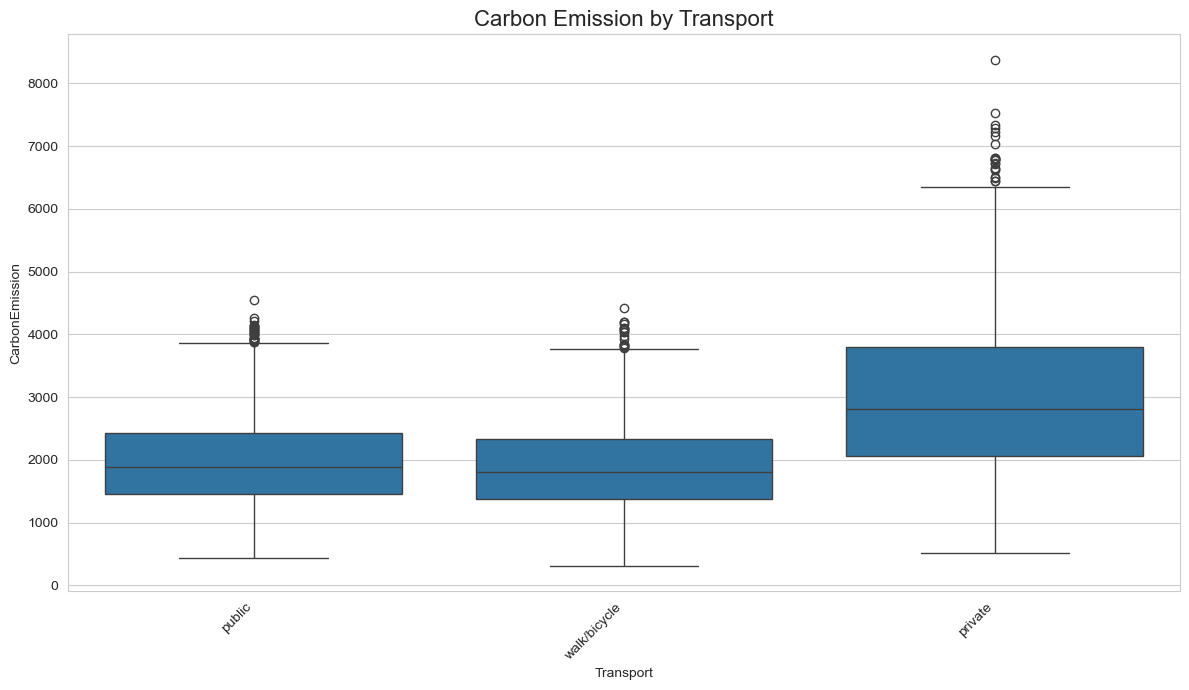

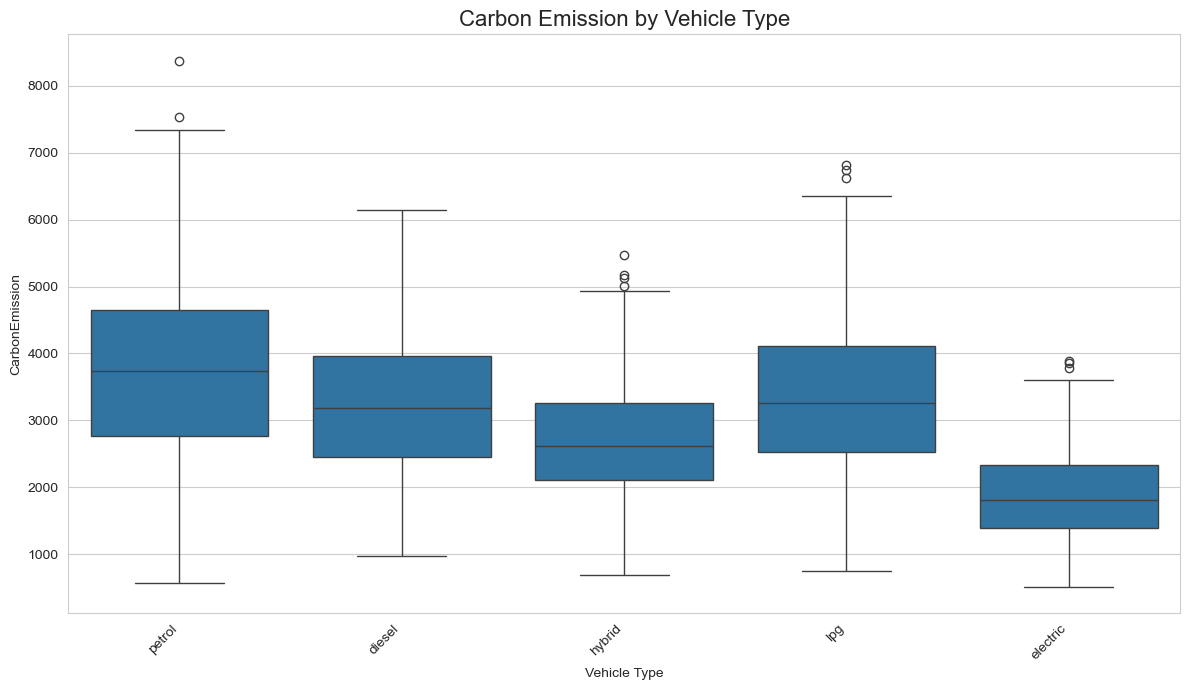

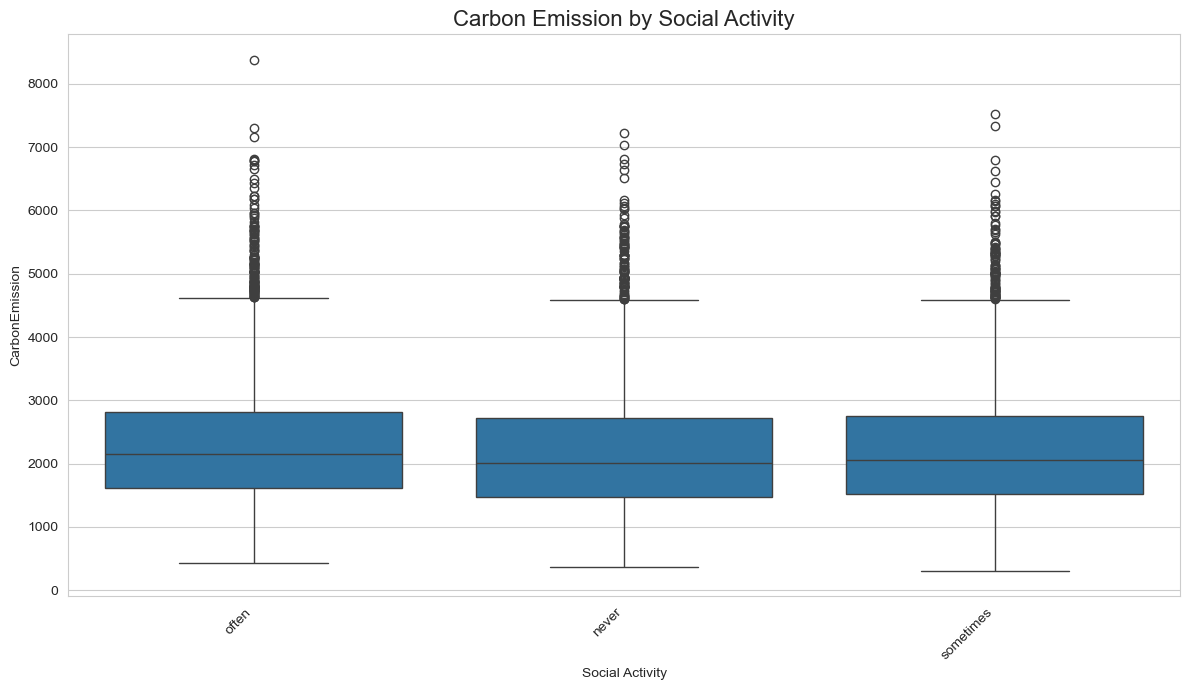

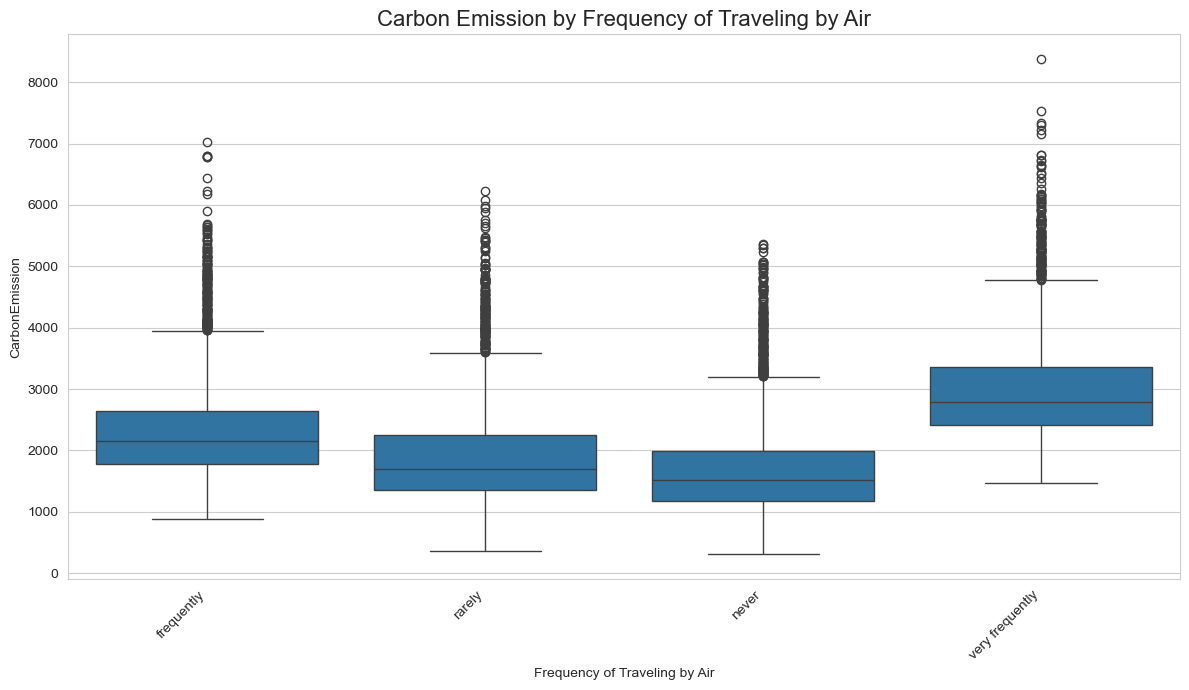

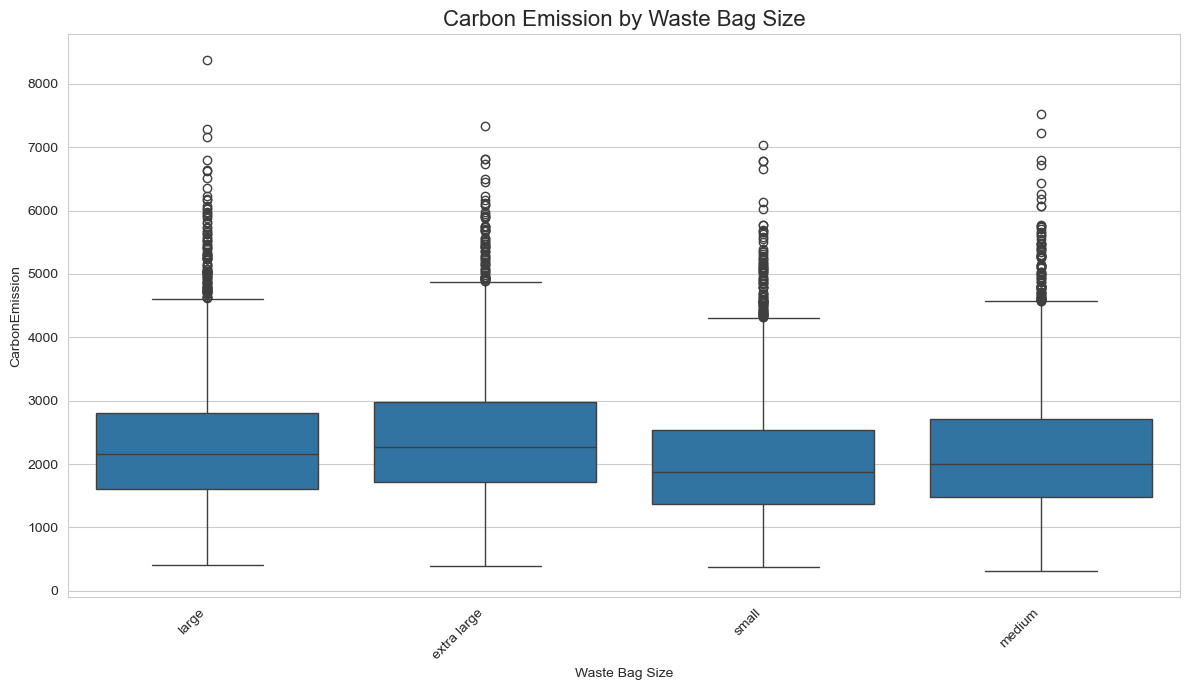

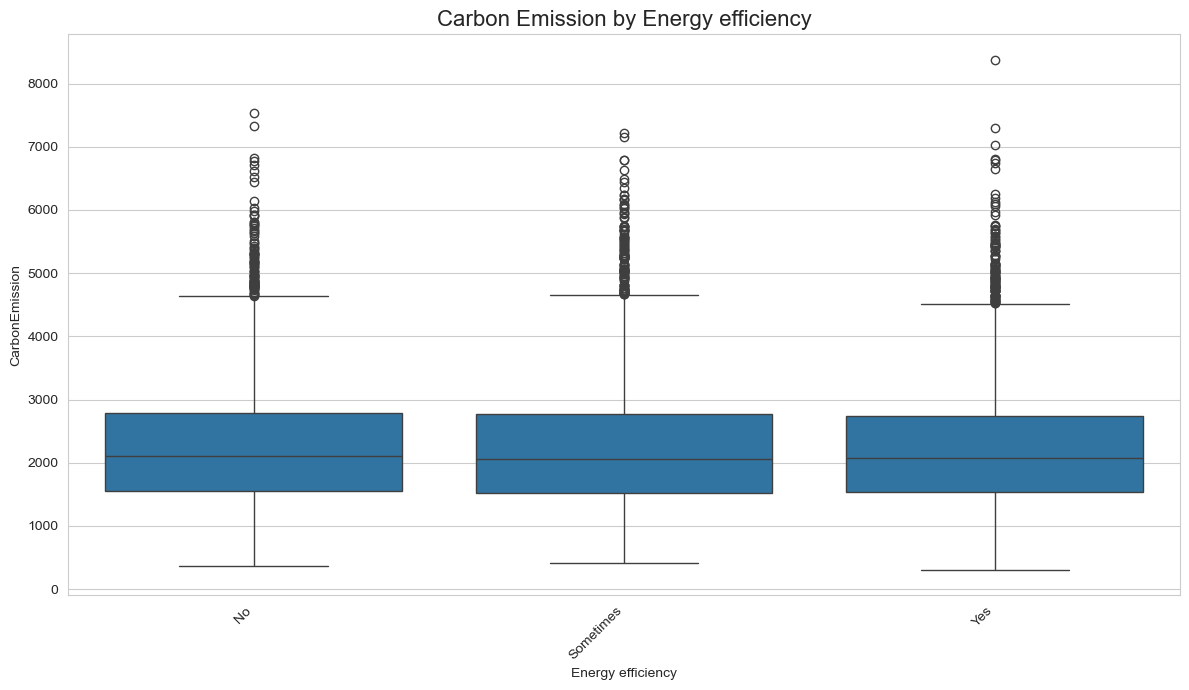

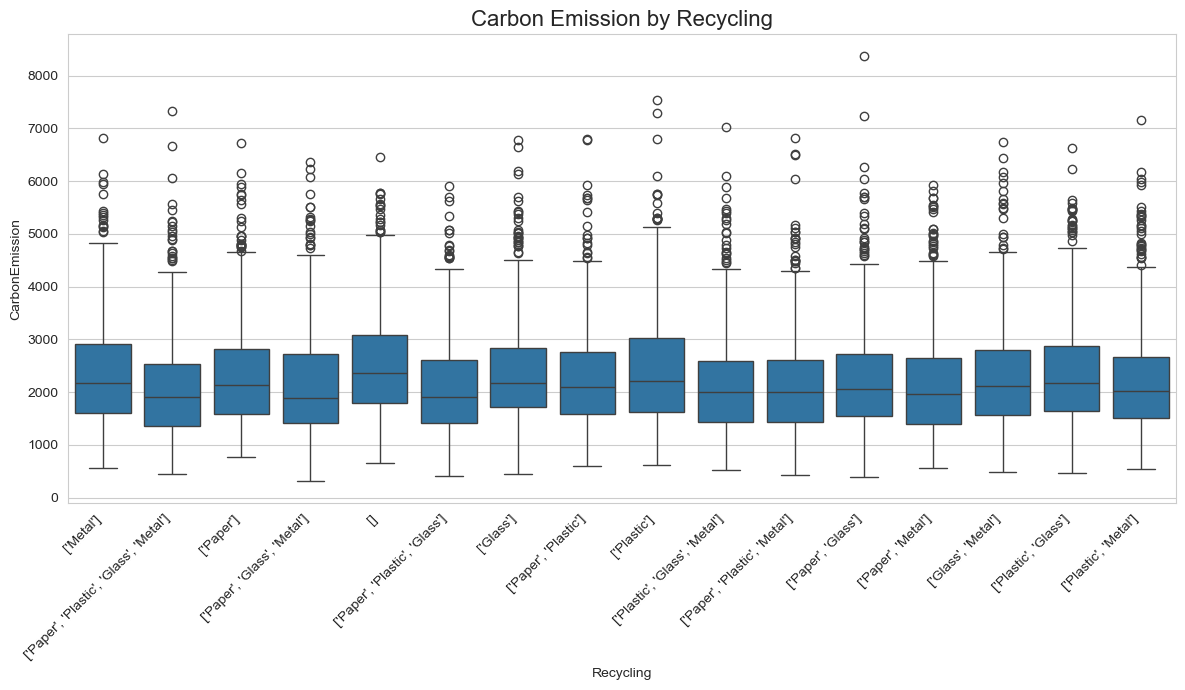

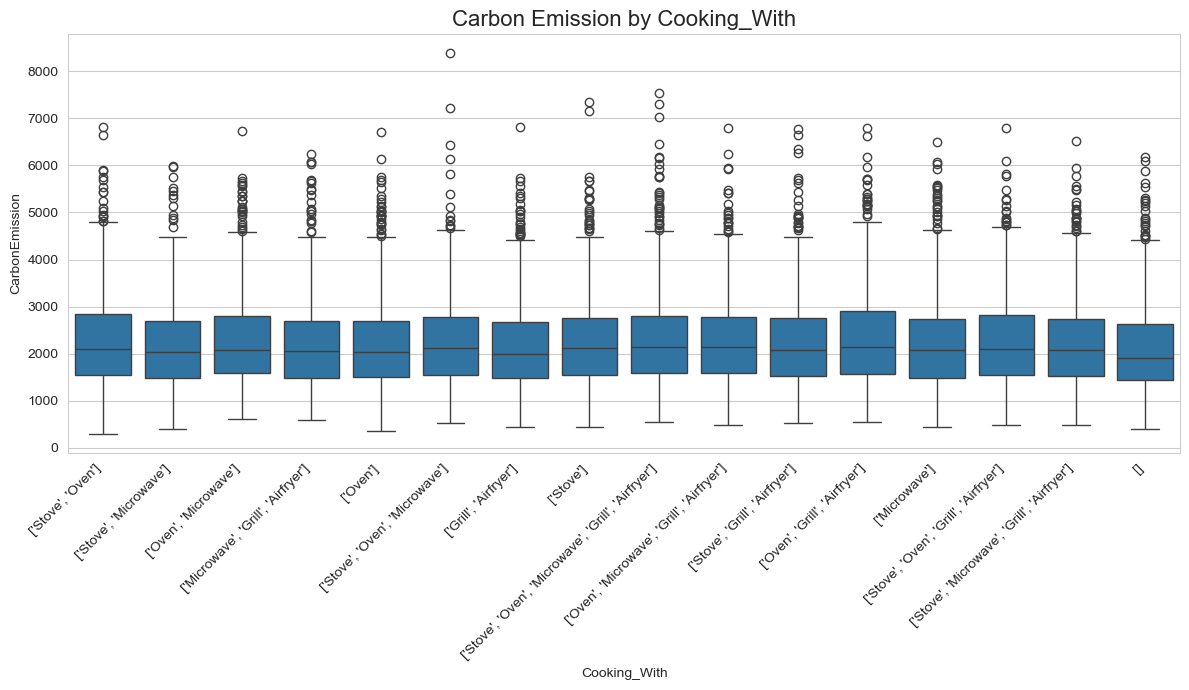

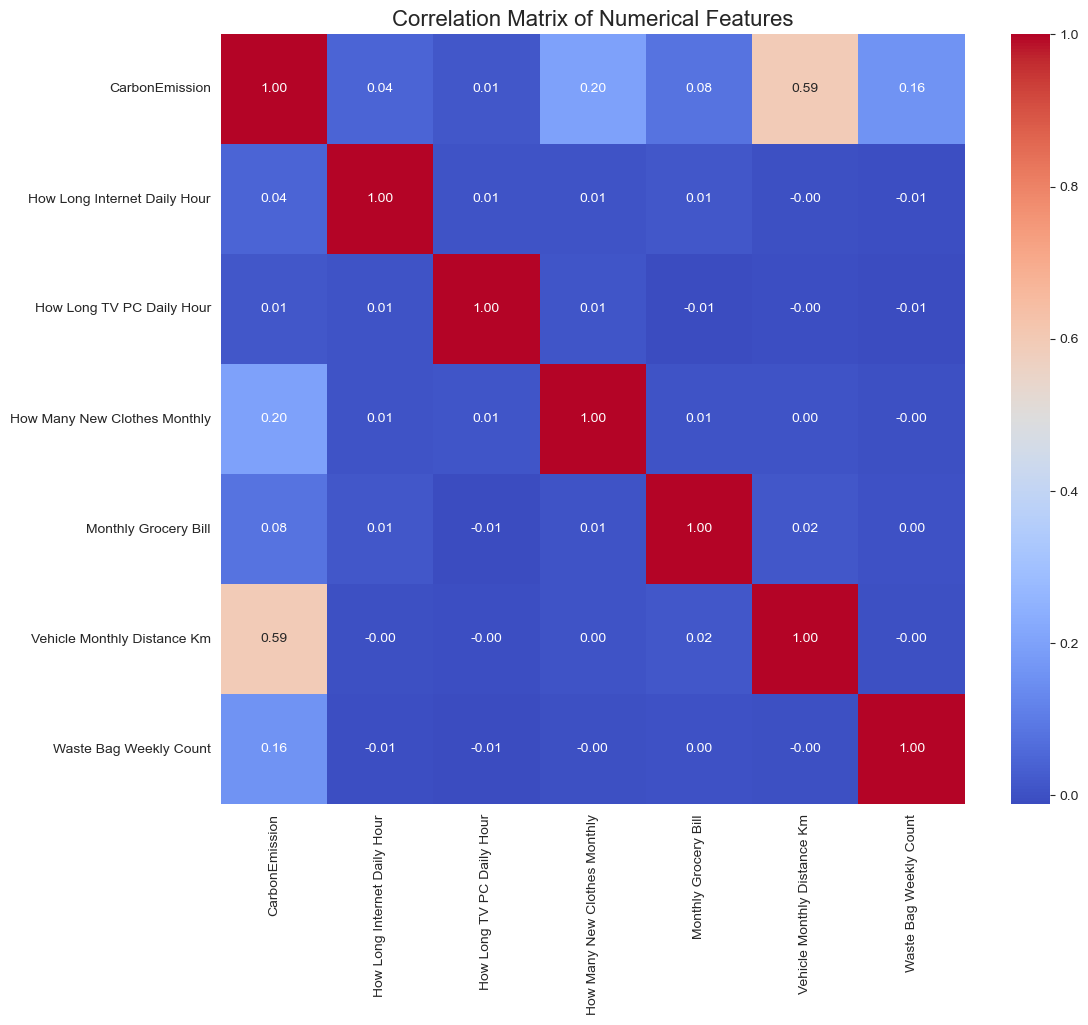

In [31]:
# Set the style for the plots
sns.set_style("whitegrid")

# --- 1. Visualize the Target Variable Distribution ---
# Understanding the distribution of your target variable is the first step.
plt.figure(figsize=(10, 6))
sns.histplot(df['CarbonEmission'], kde=True, bins=30)
plt.title('Distribution of Carbon Emission (Target Variable)', fontsize=16)
plt.xlabel('Carbon Emission')
plt.ylabel('Frequency')
plt.show()


# --- 2. Numerical Features vs. Carbon Emission ---
# Use scatter plots to see the relationship between numerical features and the target.
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
# Exclude the target variable itself from the list of features to plot
numerical_features = numerical_features.drop('CarbonEmission')

print("Visualizing relationships between numerical features and Carbon Emission...")
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    # regplot creates a scatter plot and fits a linear regression model
    sns.regplot(x=feature, y='CarbonEmission', data=df, scatter_kws={'alpha':0.3})
    plt.title(f'Carbon Emission vs. {feature}', fontsize=16)
    plt.show()


# --- 3. Categorical Features vs. Carbon Emission ---
# Box plots are great for seeing how the target variable is distributed across different categories.
categorical_features = df.select_dtypes(include=['object']).columns

print("\nVisualizing relationships between categorical features and Carbon Emission...")
for feature in categorical_features:
    plt.figure(figsize=(12, 7))
    sns.boxplot(x=feature, y='CarbonEmission', data=df)
    plt.title(f'Carbon Emission by {feature}', fontsize=16)
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
    plt.tight_layout() # Adjust layout to make room for labels
    plt.show()


# --- 4. Correlation Heatmap for Numerical Features ---
# A heatmap is a fantastic way to see correlations between all numerical variables at once.
# This helps identify which features are most correlated with the target and with each other.
plt.figure(figsize=(12, 10))
# First, calculate the correlation matrix
correlation_matrix = df[numerical_features.union(['CarbonEmission'])].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

##Numerical Features:
Monthly Grocery Bill
Vehicle Monthly Distance Km
Waste Bag Weekly Count
How Many New Clothes Monthly
Categorical Features:
Body Type
Sex
Diet
How Often Shower
Heating Energy Source
Transport
Vehicle Type
Frequency of Traveling by Air
Waste Bag Size
Columns That Were Dropped:
As requested, we removed the following columns because they were either less impactful or more complex to process for this specific linear model:
Social Activity
How Long TV PC Daily Hour
How Long Internet Daily Hour
Recycling
Cooking_With
Energy efficiency

In [32]:
# Define columns to keep and drop
columns_to_drop = [
    'Social Activity', 'How Long TV PC Daily Hour', 'How Long Internet Daily Hour',
    'Recycling', 'Cooking_With', 'Energy efficiency'
]

# Create a new DataFrame with only the columns we need
df_clean = df.drop(columns=columns_to_drop)
print("Columns have been dropped. The remaining features are:")
print(df_clean.columns)

# We also need to handle rows where the Vehicle Type is missing (e.g., for public transport users)
# A simple and effective way is to fill these missing values with a placeholder like 'none'
df_clean['Vehicle Type'] = df_clean['Vehicle Type'].fillna('none')

Columns have been dropped. The remaining features are:
Index(['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source',
       'Transport', 'Vehicle Type', 'Monthly Grocery Bill',
       'Frequency of Traveling by Air', 'Vehicle Monthly Distance Km',
       'Waste Bag Size', 'Waste Bag Weekly Count',
       'How Many New Clothes Monthly', 'CarbonEmission'],
      dtype='object')


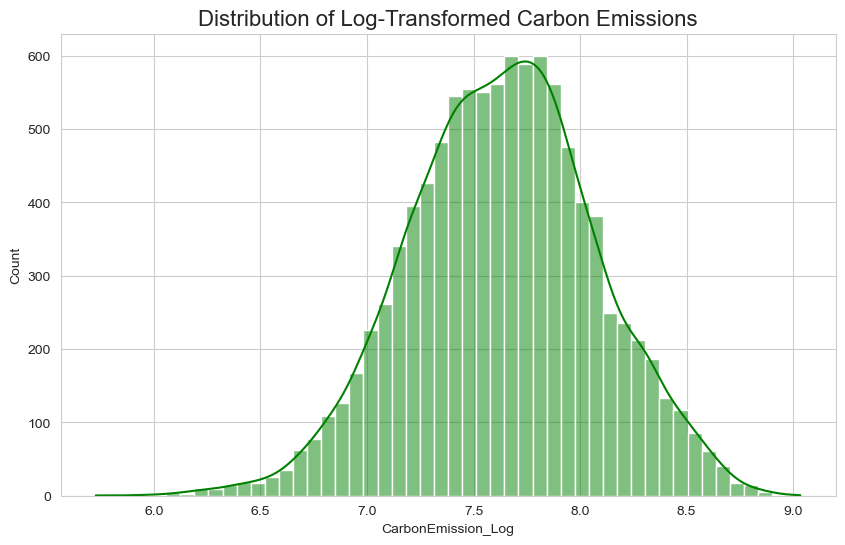

In [33]:
# Transform the target variable using log(1+x)
df_clean['CarbonEmission_Log'] = np.log1p(df_clean['CarbonEmission'])

# Let's visualize the new distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['CarbonEmission_Log'], kde=True, bins=50, color='green')
plt.title('Distribution of Log-Transformed Carbon Emissions', fontsize=16)
plt.show()

In [34]:
# Let's manually one-hot encode the 'Sex' column to demonstrate the concept
print("\n--- Manual One-Hot Encoding Demonstration ---")
print("Original 'Sex' column head:")
print(df_clean['Sex'].head())

# Create a new column 'Sex_male'
# It will be 1 if Sex is 'male', and 0 otherwise
df_clean['Sex_male'] = df_clean['Sex'].apply(lambda x: 1 if x == 'male' else 0)

print("\nAfter manual encoding (new 'Sex_male' column):")
print(df_clean[['Sex', 'Sex_male']].head())
print("---------------------------------------------")
# For the final model, it's more efficient to use pandas' built-in function
# We will drop the original 'Sex' column and all other original categorical columns later.


--- Manual One-Hot Encoding Demonstration ---
Original 'Sex' column head:
0    female
1    female
2      male
3      male
4    female
Name: Sex, dtype: object

After manual encoding (new 'Sex_male' column):
      Sex  Sex_male
0  female         0
1  female         0
2    male         1
3    male         1
4  female         0
---------------------------------------------


In [35]:
# Define features and the new log-transformed target
X = df_clean.drop(['CarbonEmission', 'CarbonEmission_Log'], axis=1)
y_log = df_clean['CarbonEmission_Log']

# Convert all categorical variables into dummy variables
X_encoded = pd.get_dummies(X, drop_first=True)

print("\nShape of data before one-hot encoding:", X.shape)
print("Shape of data after one-hot encoding:", X_encoded.shape)
print("\nNew columns created by pd.get_dummies:")
print(X_encoded.columns)

## **Explanation:**
## The `pd.get_dummies()` function automatically found all the text-based columns and converted them into new binary (0/1) columns. For example, `Diet_omnivore`, `Diet_pescatarian`, etc. The `drop_first=True` argument prevents redundancy, making our model more stable. Our feature set has expanded from 9 columns to 25, all of which are now numerical.




Shape of data before one-hot encoding: (10000, 14)
Shape of data after one-hot encoding: (10000, 31)

New columns created by pd.get_dummies:
Index(['Monthly Grocery Bill', 'Vehicle Monthly Distance Km',
       'Waste Bag Weekly Count', 'How Many New Clothes Monthly', 'Sex_male',
       'Body Type_obese', 'Body Type_overweight', 'Body Type_underweight',
       'Sex_male', 'Diet_pescatarian', 'Diet_vegan', 'Diet_vegetarian',
       'How Often Shower_less frequently', 'How Often Shower_more frequently',
       'How Often Shower_twice a day', 'Heating Energy Source_electricity',
       'Heating Energy Source_natural gas', 'Heating Energy Source_wood',
       'Transport_public', 'Transport_walk/bicycle', 'Vehicle Type_electric',
       'Vehicle Type_hybrid', 'Vehicle Type_lpg', 'Vehicle Type_none',
       'Vehicle Type_petrol', 'Frequency of Traveling by Air_never',
       'Frequency of Traveling by Air_rarely',
       'Frequency of Traveling by Air_very frequently', 'Waste Bag Size_large'

In [36]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X_encoded, y_log, test_size=0.2, random_state=42
)

In [37]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train_log)
print("\nLinear Regression model trained successfully!")



Linear Regression model trained successfully!


In [38]:
# Make predictions on the test set
log_predictions = model.predict(X_test)

# IMPORTANT: We must convert the predictions back to their original scale
# by reversing the log transformation (using exp(x) - 1)
predictions = np.expm1(log_predictions)
y_test_actual = np.expm1(y_test_log)


In [39]:
# --- Model Evaluation ---
r2 = r2_score(y_test_actual, predictions)
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))

print("\n--- Model Evaluation Results ---")
print(f"R-squared (R²): {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("--------------------------------")


--- Model Evaluation Results ---
R-squared (R²): 0.878
Mean Absolute Error (MAE): 237.30
Root Mean Squared Error (RMSE): 355.96
--------------------------------



Predictions saved to 'carbon_emission_predictions.csv'


<Figure size 1000x600 with 0 Axes>

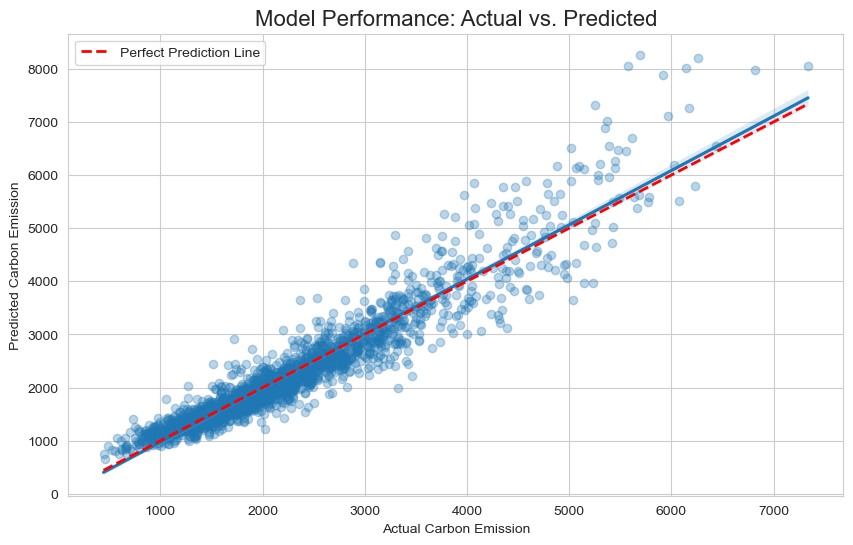

In [40]:
# Create a DataFrame for easy plotting
results = pd.DataFrame({'Actual': y_test_actual, 'Predicted': predictions})

results.to_csv('carbon_emission_predictions.csv', index=False)

print("\nPredictions saved to 'carbon_emission_predictions.csv'")

plt.figure(figsize=(10, 6))

plt.figure(figsize=(10, 6))
sns.regplot(x='Actual', y='Predicted', data=results, scatter_kws={'alpha': 0.3})
plt.plot([results['Actual'].min(), results['Actual'].max()], 
         [results['Actual'].min(), results['Actual'].max()], 
         'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel("Actual Carbon Emission")
plt.ylabel("Predicted Carbon Emission")
plt.title("Model Performance: Actual vs. Predicted", fontsize=16)
plt.legend()
plt.show()